In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

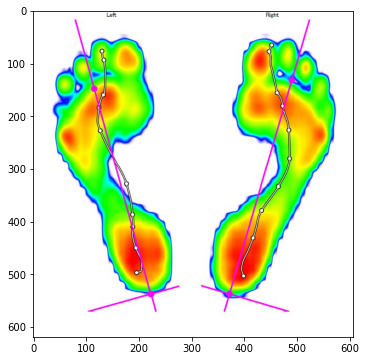

In [3]:
path = "./jpg-data/002b_st.jpg"

img = plt.imread(path)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.show()

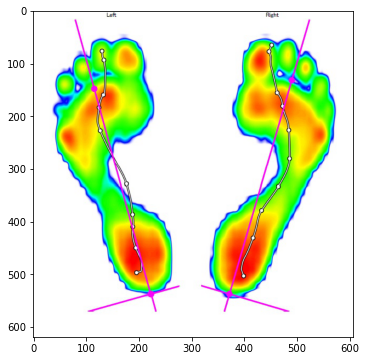

In [4]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [186]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

img_hsv_h = img_hsv[..., 0]
img_hsv_s = img_hsv[..., 1]
img_hsv_v = img_hsv[..., 2]

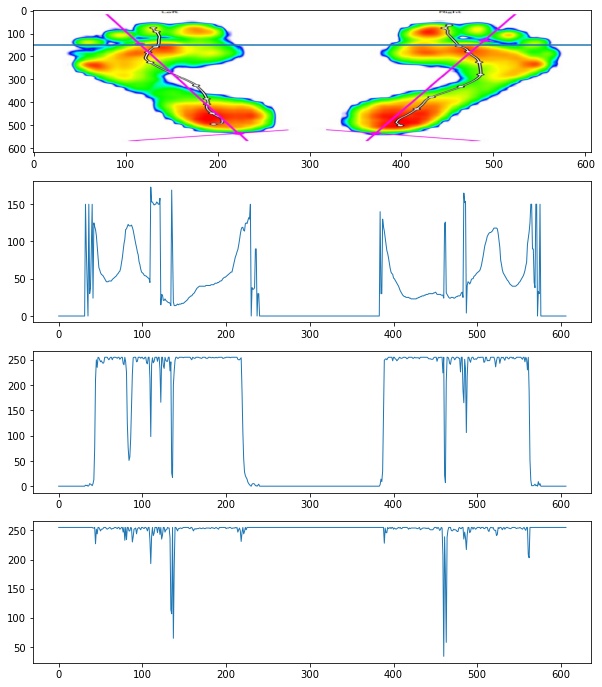

In [199]:
plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.axhline(y=150, xmin=0, xmax=1)
plt.imshow(img, aspect="auto")

tmp_x = range(img.shape[1])

plt.subplot(4, 1, 2)
plt.plot(tmp_x, img_hsv[150,:, 0], linewidth=1)

plt.subplot(4, 1, 3)
plt.plot(tmp_x, img_hsv[150,:, 1], linewidth=1)

plt.subplot(4, 1, 4)
plt.plot(tmp_x, img_hsv[150,:, 2], linewidth=1)

plt.show()

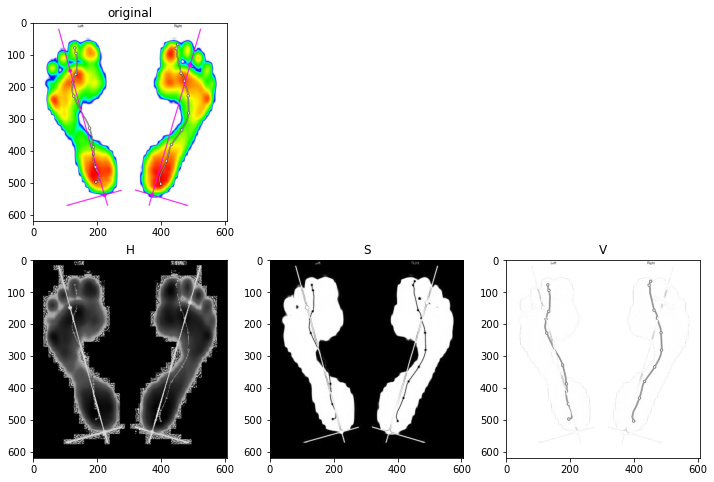

In [43]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1);plt.title("original");plt.imshow(img)
plt.subplot(2, 3, 4);plt.title("H");plt.imshow(img_hsv_h, cmap="gray")
plt.subplot(2, 3, 5);plt.title("S");plt.imshow(img_hsv_s, cmap="gray")
plt.subplot(2, 3, 6);plt.title("V");plt.imshow(img_hsv_v, cmap="gray")
plt.show()

## H(色相)

Hのピークは、0,30,90,120,150にみられる。

H=150がピンクであり、H>130によりピンク線を検出可能だが、足の輪郭も検出してしまうので注意。

H=0は白を検出できるが、赤も共に検出するため、役に立たない。

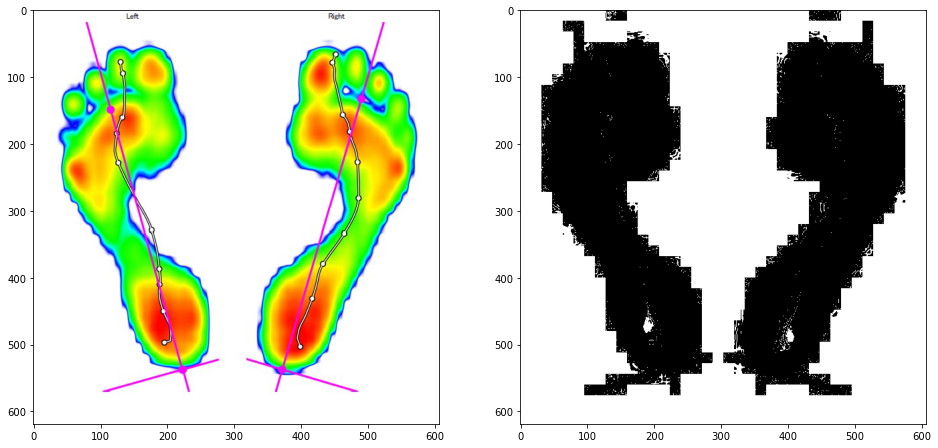

In [49]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);plt.imshow(img)
plt.subplot(1, 2, 2);plt.imshow(img_hsv_h == 0, cmap="gray")
plt.show()

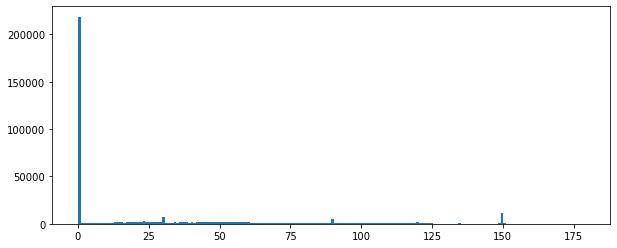

In [123]:
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_h.ravel(),bins=180)
plt.show()

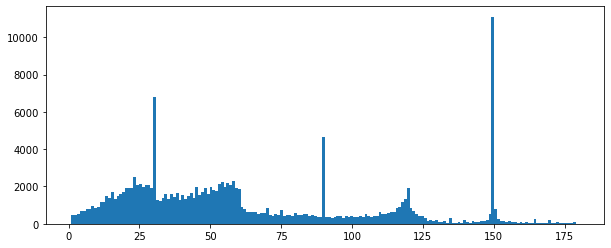

In [124]:
# 0を除いたヒストグラム
# H>=130はピンクの線を検出できる。ただし、足の周りもぼんやり検出。
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_h.ravel(), range=(1, 180),bins=180)
plt.show()

ピーク

0:白,赤(R:255 G:0 B:0)

30:黄色(R:255 G:255 B:0)

90:水色(R:0 G:255 B:255)

120:青（R:0 G:0 B:255）

150:ピンク(R:255 G:0 B:255)

In [116]:
(img_hsv_h == 0).sum(), (img_hsv_h == 30).sum(), (img_hsv_h == 90).sum(), (img_hsv_h == 120).sum(), (img_hsv_h == 150).sum()

(218671, 6818, 4671, 1910, 11103)

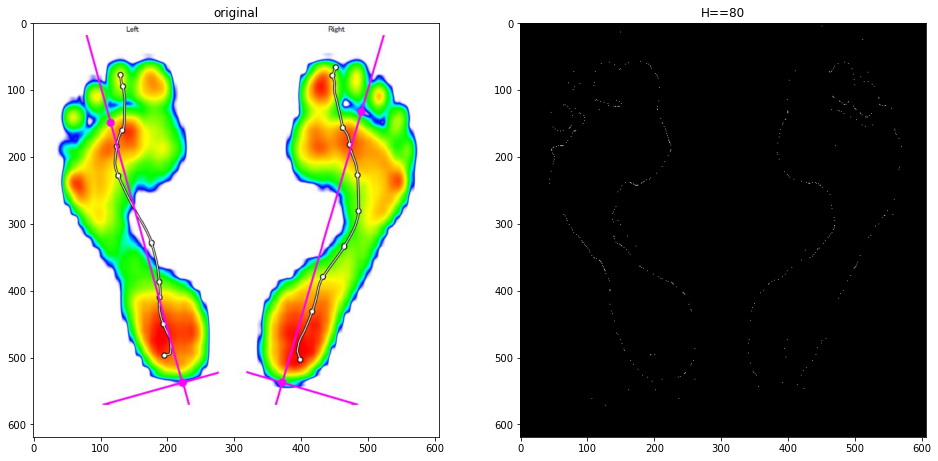

In [107]:
# 検出実験用
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);plt.title("original");plt.imshow(img)
plt.subplot(1, 2, 2);plt.title("H==");plt.imshow(img_hsv_h == 86, cmap="gray")
plt.show()

H>=130はピンクの線を検出できる。ただし、足の周りもぼんやり検出。

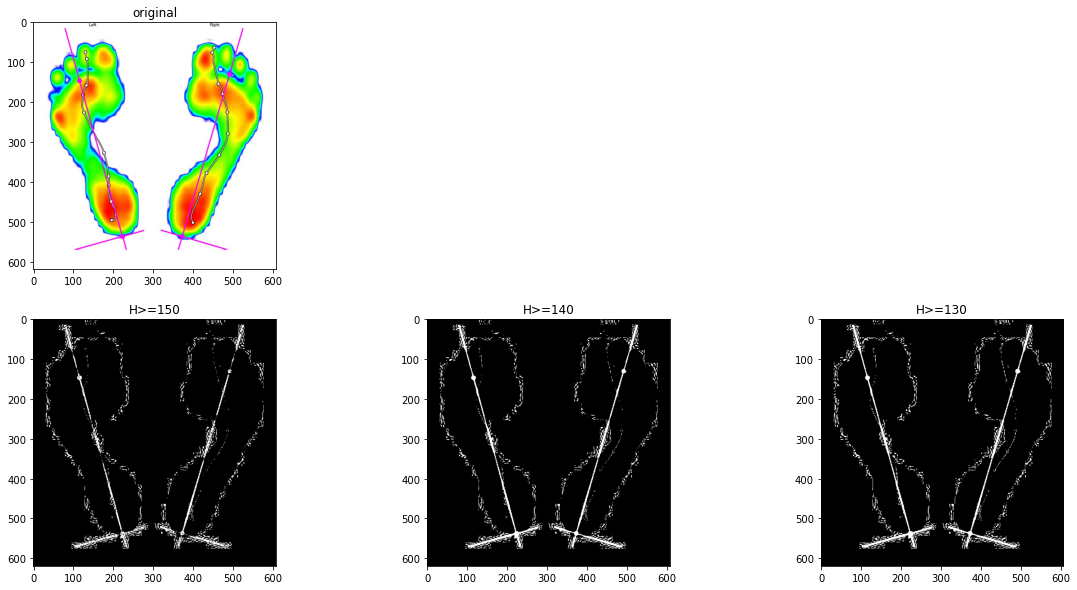

In [86]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1);plt.title("original");plt.imshow(img)
plt.subplot(2, 3, 4);plt.title("H>=150");plt.imshow(img_hsv_h >= 150, cmap="gray")
plt.subplot(2, 3, 5);plt.title("H>=140");plt.imshow(img_hsv_h >= 140, cmap="gray")
plt.subplot(2, 3, 6);plt.title("H>=130");plt.imshow(img_hsv_h >= 130, cmap="gray")
plt.show()

## S(彩度)

彩度は50以下と200以上に集中。

S<50により、白色部分を検出可能。

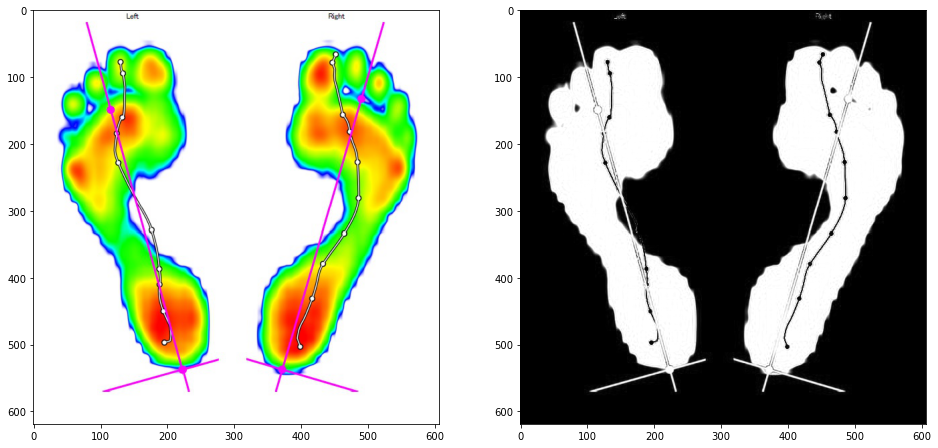

In [121]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);plt.imshow(img)
plt.subplot(1, 2, 2);plt.imshow(img_hsv_s, cmap="gray")
plt.show()

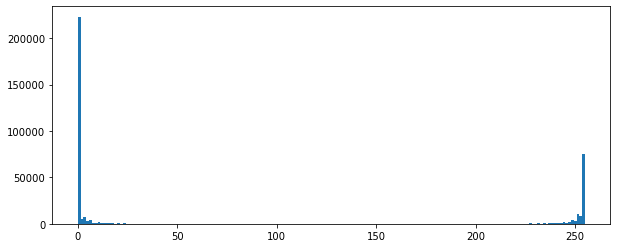

In [126]:
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_s.ravel(),bins=180)
plt.show()

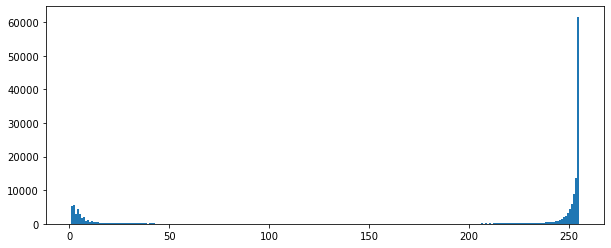

In [130]:
# 0を除いたヒストグラム
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_s.ravel(), range=(1, 255),bins=255)
plt.show()

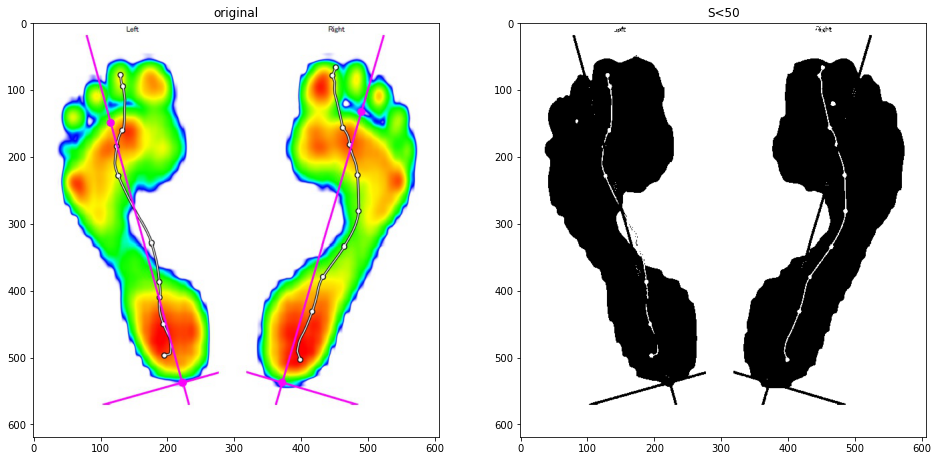

In [156]:
# 検出実験用
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);plt.title("original");plt.imshow(img)
plt.subplot(1, 2, 2);plt.title("S<50");plt.imshow(img_hsv_s < 50, cmap="gray")
plt.show()

## V(明度)

大半が250以上だが、０まである程度は存在。

V<=150により黒色部分を検出可能。

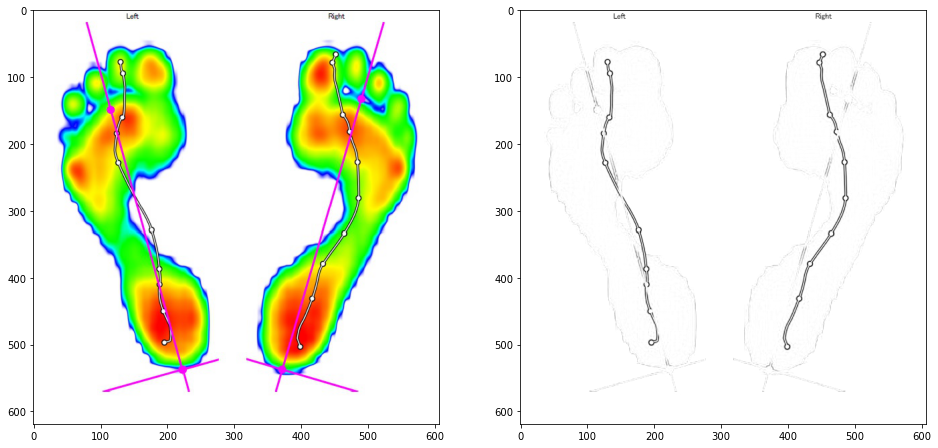

In [148]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);plt.imshow(img)
plt.subplot(1, 2, 2);plt.imshow(img_hsv_v, cmap="gray")
plt.show()

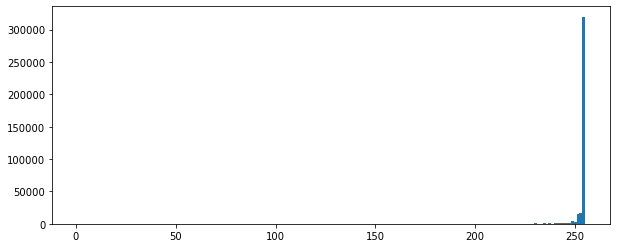

In [150]:
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_v.ravel(),bins=180)
plt.show()

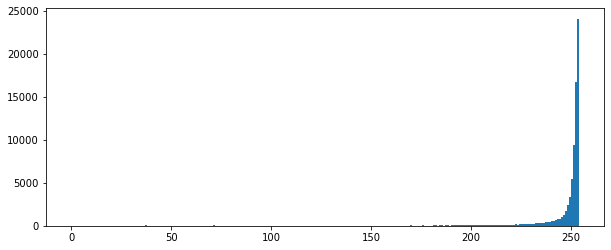

In [154]:
# 255を除いたヒストグラム
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_v.ravel(), range=(0, 254),bins=255)
plt.show()

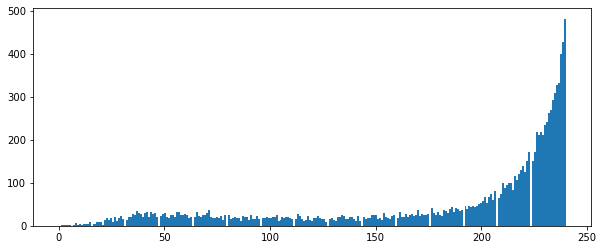

In [155]:
# 241以上を除いたヒストグラム
plt.figure(figsize=(10, 4))
plt.hist(img_hsv_v.ravel(), range=(0, 240),bins=255)
plt.show()

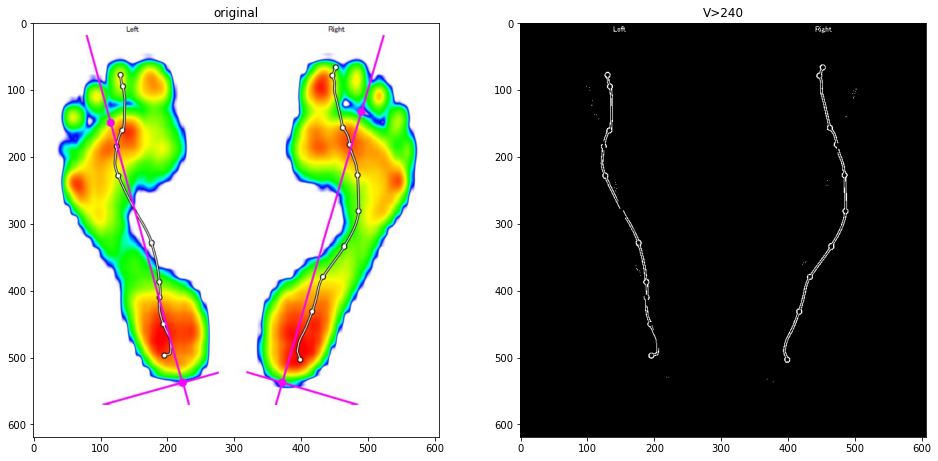

In [170]:
# 検出実験用
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1);plt.title("original");plt.imshow(img)
plt.subplot(1, 2, 2);plt.title("V>240");plt.imshow(img_hsv_v < 150, cmap="gray")
plt.show()

## まとめ

Hから圧力の値は変換可能。

H=150がピンクであり、H>130によりピンク線を検出可能だが、足の輪郭も検出してしまうので注意。

S<50により、白色部分を検出可能。

V<=150により黒色部分を検出可能。

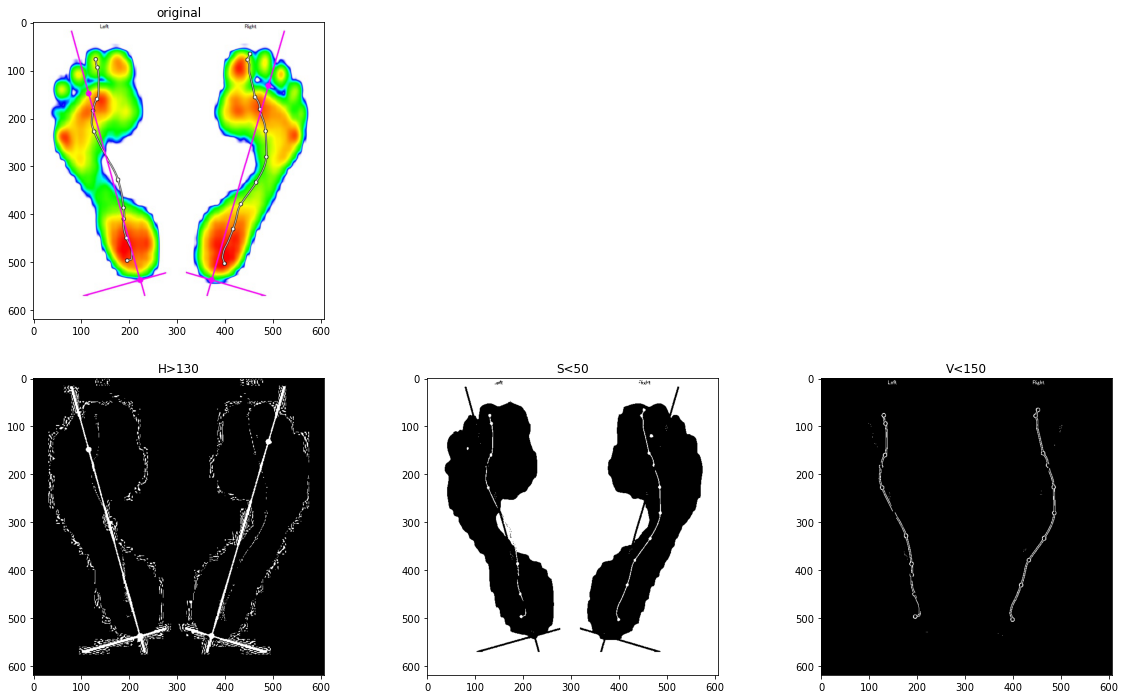

In [176]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1);plt.title("original");plt.imshow(img)
plt.subplot(2, 3, 4);plt.title("H>130");plt.imshow(img_hsv_h>130, cmap="gray")
plt.subplot(2, 3, 5);plt.title("S<50");plt.imshow(img_hsv_s<50, cmap="gray")
plt.subplot(2, 3, 6);plt.title("V<150");plt.imshow(img_hsv_v<150, cmap="gray")
plt.show()

流れとしては

1. 黒色部分を白色に。

2. 足の輪郭部分を処理後、H>130部分を白色に。

3. Hは圧が高いところが0に近くなっているが、背景の白も0なので、白以外のところはHの値を反転させる。

4. 足の範囲内については白色の部分を補完。（事前に足の範囲を作っておく必要あり）